Importing Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Importing The Dataset

In [2]:
#load the dataframe
data = pd.read_csv('Mall_Customers[1].csv')

In [3]:
#checking head
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#cheking baisc info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#statistical summary
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#checking shape of dataset
data.shape

(200, 5)

In [7]:
#checking null values
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#dropping columns
X = data.drop(columns=['CustomerID', 'Age', 'Genre'], axis=1).values

C:\Users\Aditya Singh\anaconda3\envs\Adiopencv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aditya Singh\anaconda3\envs\Adiopencv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

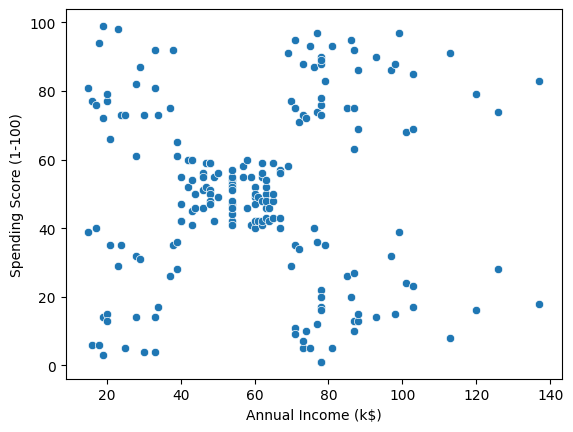

In [9]:
#scatter plot 
sns.scatterplot(data= data, x='Annual Income (k$)', y='Spending Score (1-100)')

C:\Users\Aditya Singh\anaconda3\envs\Adiopencv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aditya Singh\anaconda3\envs\Adiopencv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aditya Singh\anaconda3\envs\Adiopencv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aditya Singh\anaconda3\envs\Adiopencv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

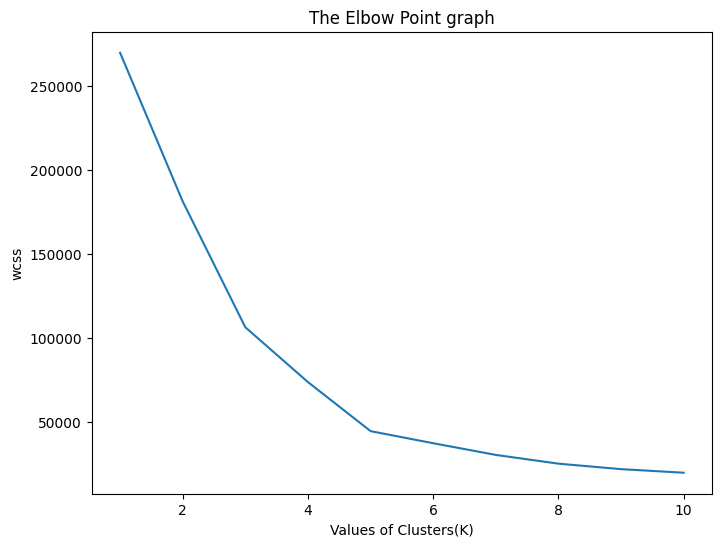

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))   
plt.plot(range(1,11), wcss)
plt.xlabel('Values of Clusters(K)')
plt.ylabel('wcss')
plt.title('The Elbow Point graph')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

C:\Users\Aditya Singh\anaconda3\envs\Adiopencv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
#checking centers
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

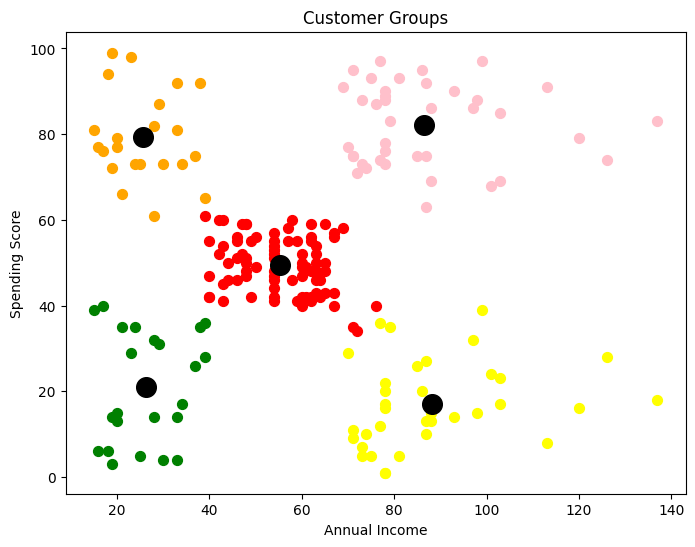

In [13]:
plt.figure(figsize=(8,6)) 
plt.scatter(X[Y==0,0],X[Y==0,1], s=50, c='red', label='clusters 1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=50, c='pink', label='clusters 2')
plt.scatter(X[Y==2,0],X[Y==2,1], s=50, c='yellow', label='clusters 3')
plt.scatter(X[Y==3,0],X[Y==3,1], s=50, c='green', label='clusters 4')
plt.scatter(X[Y==4,0],X[Y==4,1], s=50, c='orange', label='clusters 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='clusters 6')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Conclusion:**

This is the analysis of customer segmentation using kmeans clustering algorithm.
we can see that 5 cluters formed, and the black dots represent the centroid of each customer.
